In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import joblib

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


In [28]:
data = pd.read_csv("D:/6-Data Sets/student_performance.csv")


In [3]:
print("First 5 rows:\n", data.head())
print("\nColumns:", data.columns.tolist())
print("\nShape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nInfo:")
data.info()
print("\nDescriptive Statistics:\n", data.describe(include='all'))

First 5 rows:
    student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  

Columns: ['student_id', 'weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'total_score', 'grade']

Shape: (1000000, 6)

Data Types:
 student_id                   int64
weekly_self_study_hours    float64
attendance_percentage      float64
class_participation        float64
total_score                floa

student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64


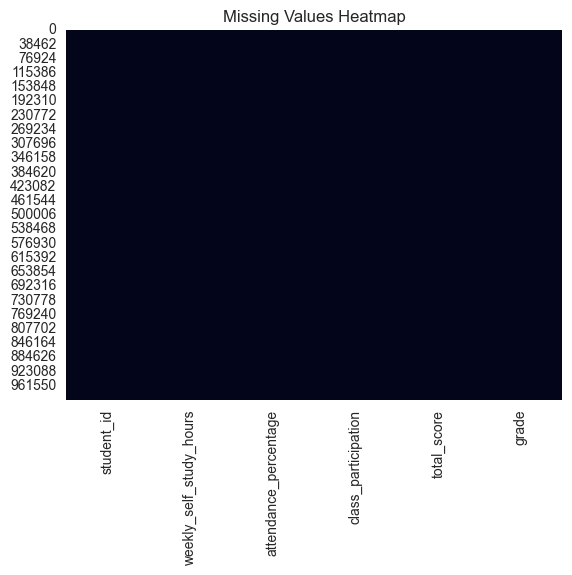

In [29]:
# 🔹 Missing Values Check
print(data.isnull().sum())

sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()



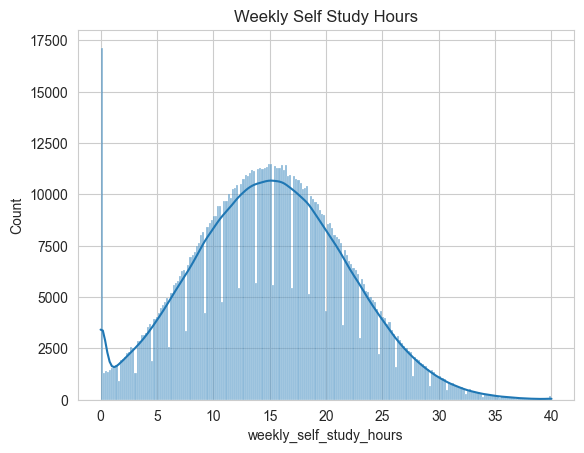

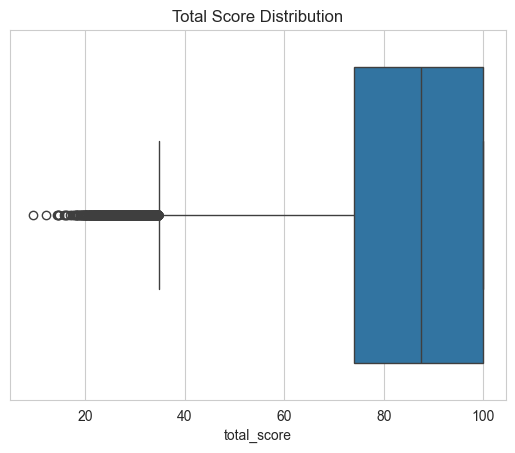

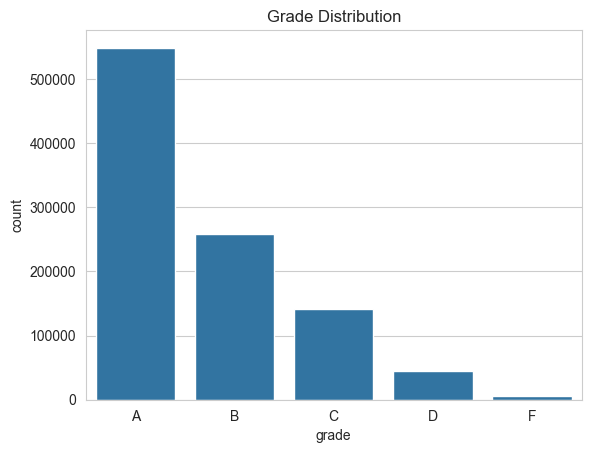

In [30]:
# Univariate Analysis
sns.histplot(data['weekly_self_study_hours'], kde=True)
plt.title("Weekly Self Study Hours")
plt.show()

sns.boxplot(x=data['total_score'])
plt.title("Total Score Distribution")
plt.show()

sns.countplot(x='grade', data=data)
plt.title("Grade Distribution")
plt.show()


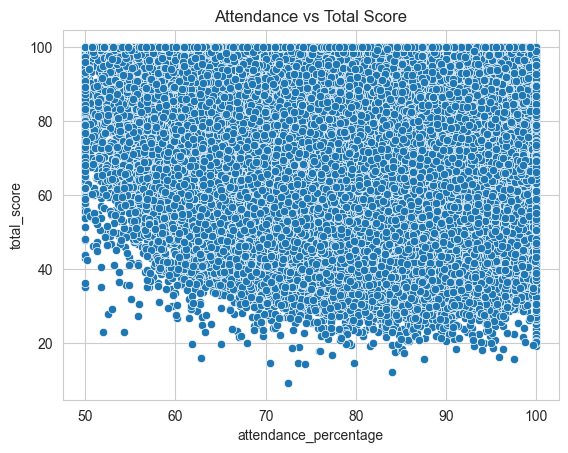

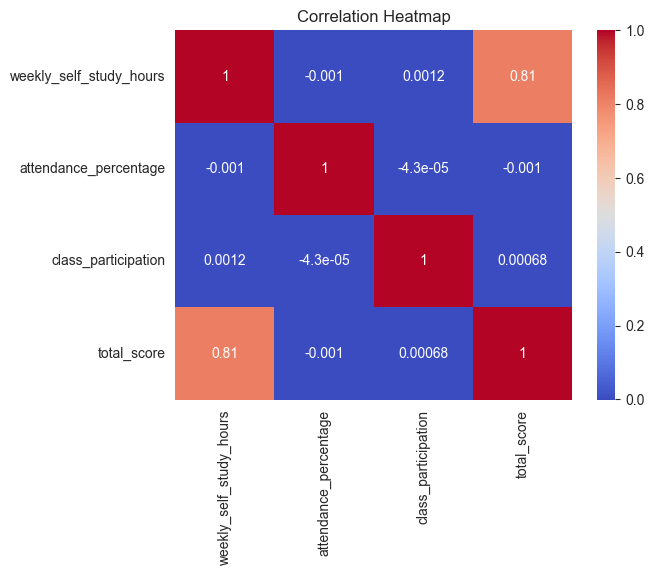

In [31]:
# Bivariate & Correlation Analysis
sns.scatterplot(x='attendance_percentage', y='total_score', data=data)
plt.title("Attendance vs Total Score")
plt.show()

numeric_cols = [
    'weekly_self_study_hours',
    'attendance_percentage',
    'class_participation',
    'total_score'
]

sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [32]:
df = data.copy()
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'])


In [33]:
X = df[['weekly_self_study_hours',
        'attendance_percentage',
        'class_participation',
        'grade']]

y = df['total_score']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9303897717321341
RMSE: 4.0709247055112625


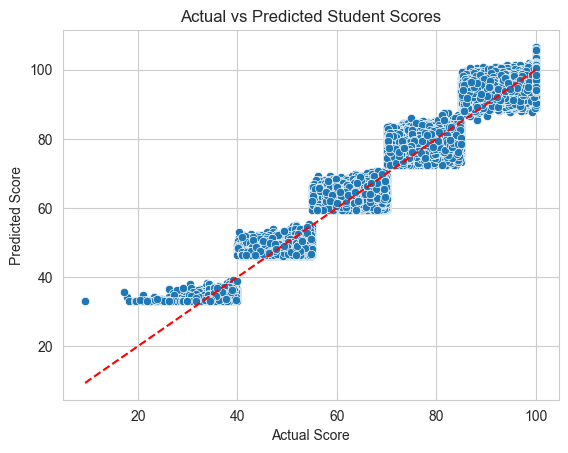

In [37]:
# Actual vs Predicted Visualization
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Student Scores")
plt.show()


In [38]:
joblib.dump(model, "student_score_model.pkl")
df.to_csv("student_data_encoded.csv", index=False)


In [25]:
import joblib
joblib.dump(model, "student_score_model.pkl")
print("Trained model saved as 'student_score_model.pkl'")

Trained model saved as 'student_score_model.pkl'
